# TWEB Project 2023/2024 - Department of Computer Science | University of Turin

# Large Scale Data Analytics using Jupyter Notebooks 

## Authors: 
### - Daniel Rabottini - 933913
### - Zakaria Abourida - 950120
### - Tommaso Remondino - 947410

# 0. Preliminary actions


### Import library:
Libraries used for data analysis.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium
import time
import json

### Import DataFrame:
Import DataFrame from CSV files.

In [2]:
appearances_df = pd.read_csv('venv/dataframe/appearances.csv')
club_games_df = pd.read_csv('venv/dataframe/club_games.csv')
clubs_df = pd.read_csv('venv/dataframe/clubs.csv')
competitions_df = pd.read_csv('venv/dataframe/competitions.csv')
game_events_df = pd.read_csv('venv/dataframe/game_events.csv')
game_lineups_df = pd.read_csv('venv/dataframe/game_lineups.csv')
games_df = pd.read_csv('venv/dataframe/games.csv')
player_valuations_df = pd.read_csv('venv/dataframe/player_valuations.csv')
players_df = pd.read_csv('venv/dataframe/players.csv')

# 1. DataFrame cleanup and optimization

## 1.1 DataFrame visualization and information

### Appearances Dataframe:
Contains information about player appearances in games, including player IDs, club IDs, competition IDs, and performance metrics like yellow cards, red cards, goals, assists, and minutes played.


In [3]:
appearances_df

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507346,4172154_659813,4172154,659813,15,15,2023-11-30,Piero Hincapié,EL,0,0,0,0,90
1507347,4172154_696027,4172154,696027,15,15,2023-11-30,Ayman Aourir,EL,0,0,0,0,2
1507348,4172154_7161,4172154,7161,15,15,2023-11-30,Jonas Hofmann,EL,0,0,0,0,10
1507349,4172154_743395,4172154,743395,15,15,2023-11-30,Noah Mbamba,EL,0,0,0,0,45


### Club Games Dataframe:
Details about club games, including game ID, club ID, goals, positions, manager names, and opponent information.

In [4]:
club_games_df

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2221751,431,1,NaN,Lutz Göttling,60,2,NaN,Christian Streich,Home,0
1,2221755,83,3,NaN,Ralph Hasenhüttl,4795,0,NaN,Tomas Oral,Home,1
2,2222597,3725,2,2.0,Stanislav Cherchesov,232,1,5.0,Unai Emery,Home,1
3,2222627,2696,0,11.0,Andrey Kobelev,4128,2,10.0,Rustem Khuzin,Home,0
4,2222658,2410,0,2.0,Leonid Slutski,121,2,13.0,Dan Petrescu,Home,0
...,...,...,...,...,...,...,...,...,...,...,...
130427,4126931,20923,2,NaN,Sergey Perednya,12065,1,NaN,Aleksandr Gorbachev,Away,1
130428,4148237,920,0,NaN,Ruaidhri Higgins,10481,1,NaN,Milic Curcic,Away,0
130429,4171268,681,2,NaN,Imanol Alguacil,409,0,NaN,Gerhard Struber,Away,1
130430,4148252,144,3,NaN,Sergej Jakirovic,10532,1,NaN,Dan Brimsvík,Away,1


### Clubs Dataframe:
The clubs dataframe contains information about the main clubs in the world. 
Specifically, it contains details of a club such as name, number of players, average age and the stadium in which they play andother related information.


In [5]:
clubs_df

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,NaN,30,26.4,11,36.7,1,Merck-Stadion am Böllenfalltor,17810,€-1.60m,NaN,2023,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,NaN,25,28.2,13,52.0,5,Yekaterinburg Arena,23000,€-770k,NaN,2023,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,32,27.4,16,50.0,13,Tüpraş Stadyumu,42590,€-14.50m,NaN,2023,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,27.4,17,65.4,17,Olimpico di Roma,73261,+€65.20m,NaN,2023,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,29,26.2,21,72.4,22,Tottenham Hotspur Stadium,62062,€-130.40m,NaN,2023,https://www.transfermarkt.co.uk/tottenham-hots...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,68608,cf-os-belenenses,CF Os Belenenses,PO1,NaN,30,25.7,5,16.7,0,Estádio do Restelo,19980,+-0,NaN,2017,https://www.transfermarkt.co.uk/cf-os-belenens...
422,724,fc-volendam,Football Club Volendam,NL1,NaN,29,22.8,14,48.3,3,Kras Stadion,7384,+€1.80m,NaN,2023,https://www.transfermarkt.co.uk/fc-volendam/st...
423,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,NaN,25,27.2,17,68.0,15,Gewiss Stadium,21747,+€87.00m,NaN,2023,https://www.transfermarkt.co.uk/atalanta-berga...
424,979,moreirense-fc,Moreirense Futebol Clube,PO1,NaN,26,26.0,17,65.4,2,Estádio C. J. de Almeida Freitas,6153,€-2.05m,NaN,2023,https://www.transfermarkt.co.uk/moreirense-fc/...


### Competitions Dataframe: 
The competitions dataframe contains the mains european competitions. 
Specifically, it contains the details of the competition such as name, country of origin, international or domestic and other related information.


In [6]:
competitions_df

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...
3,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa,https://www.transfermarkt.co.uk/supertaca-cand...
4,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa,https://www.transfermarkt.co.uk/russian-super-...
5,SUC,supercopa,supercopa,domestic_super_cup,other,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/supercopa/star...
6,USC,uefa-super-cup,uefa-super-cup,uefa_super_cup,other,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/uefa-super-cup...
7,DK1,superligaen,superligaen,first_tier,domestic_league,39,Denmark,DK1,europa,https://www.transfermarkt.co.uk/superligaen/st...
8,EL,europa-league,europa-league,europa_league,international_cup,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/europa-league/...
9,ES1,laliga,laliga,first_tier,domestic_league,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/laliga/startse...


### Game events Dataframe:
The game events Dataframe contains the events that can was occurred during a match like goals, cards or substitutions.

In [7]:
game_events_df

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,2f41da30c471492e7d4a984951671677,2012-08-05,2211607,77,Cards,610,4425,"1. Yellow card , Mass confrontation",NaN,NaN
1,a72f7186d132775f234d3e2f7bc0ed5b,2012-08-05,2211607,77,Cards,383,33210,"1. Yellow card , Mass confrontation",NaN,NaN
2,b2d721eaed4692a5c59a92323689ef18,2012-08-05,2211607,3,Goals,383,36500,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,56416.0
3,aef768899cedac0c9a650980219075a2,2012-08-05,2211607,53,Goals,383,36500,", Right-footed shot, 2. Tournament Goal Assist...",NaN,146258.0
4,5d6d9533023057b6619ecd145a038bbe,2012-08-05,2211607,74,Substitutions,383,36500,", Not reported",49499.0,NaN
...,...,...,...,...,...,...,...,...,...,...
666553,7f5a6b61ca858e0cd63a58c554b56bb7,2023-11-15,4228114,82,Substitutions,358,874064,", Tactical",965607.0,NaN
666554,5b93d1bc9e8bf42965682d491e1dd6c7,2023-11-15,4228114,44,Goals,46889,922572,", Penalty, 1. Tournament Goal",NaN,NaN
666555,d638b1e72f531c413487d413258a3130,2023-11-15,4228114,68,Substitutions,46889,922572,", Tactical",1200869.0,NaN
666556,0ff7774aa1383af83e40c435325463af,2023-11-15,4228114,68,Substitutions,46889,1200864,", Tactical",921121.0,NaN


### Game lineups Dataframe:
Data about player lineups for different games, including game ID, player ID, and position.

In [8]:
game_lineups_df

,game_lineups_id,game_id,club_id,type,number,player_id,player_name,team_captain,position
0,77b0f371923e0c8bdf050a1e269faaac,3606208,338,starting_lineup,89,419061,Vladyslav Supryaga,0,Centre-Forward
1,cb6eeedb9f728570615d37b6fe7facaf,3606208,338,starting_lineup,10,368611,Mykola Shaparenko,0,Central Midfield
2,8e63d5f47aac2bdb0e54f5481986e104,3606208,338,starting_lineup,5,124182,Sergiy Sydorchuk,1,Defensive Midfield
3,ea4a96d8be410f2d646cf095c4faae7f,3606208,338,starting_lineup,94,181118,Tomasz Kedziora,0,Right-Back
4,e6abe553801b09bc623c3deb96acba17,3606208,338,starting_lineup,16,404842,Vitaliy Mykolenko,0,Left-Back
...,...,...,...,...,...,...,...,...,...
119128,f4e6a6b2e3d24d12290c6ce4168e1bdb,4228114,46889,substitutes,3,1200869,Thomas Chambers,0,Left-Back
119129,7a78814a66c59c79e8d40c8669a67d3f,4228114,46889,substitutes,5,1203716,Mohammed-Idris Oshilaja,0,Defender
119130,09cc07767ce441b4de4a76c102fd17d5,4228114,46889,substitutes,13,1200870,Max Ovenden,0,Goalkeeper
119131,3c259f1849421af021aba3e84a4da8de,4228114,46889,substitutes,12,550816,Julien Anau,0,Attacking Midfield


### Games Dataframe:
The games dataframe contains the match that was played in the past.
Specifically, it contains all the general information of a match, such as the year of the season, the teams, the location of the match, the goals and other information.

In [9]:
games_df

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,...,Akhmat-Arena,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,NaN,NaN,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,...,Metallurg,11400.0,Sergey Ivanov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,...,Arena Khimki,12000.0,Sergey Karasev,https://www.transfermarkt.co.uk/cska-moscow_di...,NaN,NaN,PFK CSKA Moskva,FK Dinamo Moskva,0:2,domestic_league
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,...,RZD Arena,11408.0,Sergey Karasev,https://www.transfermarkt.co.uk/lokomotiv-mosc...,NaN,NaN,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan,1:0,domestic_league
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,...,Metallurg,7534.0,Timur Arslanbekov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65211,2367292,EL,2013,Group B,2013-11-07,383,419,2,0,NaN,...,Philips Stadion,10000.0,Cristian Balaj,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,2:0,international_cup
65212,2629035,NLP,2015,Third Round,2015-10-27,383,16866,6,0,NaN,...,Philips Stadion,31000.0,Allard Lindhout,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,6:0,domestic_cup
65213,3092951,CLQ,2018,Qualifying Round 2nd leg,2018-08-29,383,713,3,0,NaN,...,Philips Stadion,34200.0,Anthony Taylor,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,3:0,international_cup
65214,4164101,CGB,2023,Second Round,2023-08-29,512,1194,6,1,NaN,...,bet365 Stadium,9410.0,Michael Salisbury,https://www.transfermarkt.co.uk/spielbericht/i...,4-2-3-1,4-2-3-1,Stoke City,NaN,6:1,other


### Player valuations Dataframe:
The dataframe player valuations contains the market values of the players for the last season in which has participated.

In [10]:
player_valuations_df

,player_id,last_season,datetime,date,dateweek,market_value_in_eur,n,current_club_id,player_club_domestic_competition_id
0,3132,2013,2003-12-09 00:00:00,2003-12-09,2003-12-08,400000,1,126,TR1
1,6893,2012,2003-12-15 00:00:00,2003-12-15,2003-12-15,900000,1,984,GB1
2,10,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,7000000,1,398,IT1
3,26,2017,2004-10-04 00:00:00,2004-10-04,2004-10-04,1500000,1,16,L1
4,65,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,8000000,1,1091,GR1
...,...,...,...,...,...,...,...,...,...
440658,950091,2023,2023-09-21 00:00:00,2023-09-21,2023-09-18,1000000,1,1091,GR1
440659,968903,2023,2023-09-21 00:00:00,2023-09-21,2023-09-18,50000,1,653,GR1
440660,1031590,2023,2023-09-21 00:00:00,2023-09-21,2023-09-18,50000,1,6418,GR1
440661,1166093,2023,2023-09-21 00:00:00,2023-09-21,2023-09-18,50000,1,30120,GR1


### Players dataframe:
The dataframe players contains the player's personal details and physical characteristics plus other information such as the role or the foot used.

In [11]:
players_df

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
0,598,Timo,Hildebrand,Timo Hildebrand,2014,24,timo-hildebrand,Germany,Worms,Germany,...,NaN,NaN,NaN,10000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/timo-hildebran...,L1,Eintracht Frankfurt
1,670,Martin,Petrov,Martin Petrov,2012,714,martin-petrov,Bulgaria,Vratsa,Bulgaria,...,NaN,NaN,NaN,12000000.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-petrov/...,ES1,RCD Espanyol Barcelona
2,1323,Martin,Amedick,Martin Amedick,2012,24,martin-amedick,Germany,Paderborn,Germany,...,NaN,NaN,NaN,2750000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-amedick...,L1,Eintracht Frankfurt
3,3195,Jermaine,Pennant,Jermaine Pennant,2013,512,jermaine-pennant,England,Nottingham,England,...,right,173.0,NaN,10500000.0,NaN,Andrew Sky,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jermaine-penna...,GB1,Stoke City
4,3259,Damien,Duff,Damien Duff,2013,931,damien-duff,Ireland,Ballyboden,Ireland,...,left,177.0,NaN,17000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/damien-duff/pr...,GB1,Fulham FC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30297,371851,Jaka,Bijol,Jaka Bijol,2023,410,jaka-bijol,Slovenia,Vuzenica,Slovenia,...,right,190.0,10000000.0,10000000.0,2027-06-30 00:00:00,MSC GROUP,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jaka-bijol/pro...,IT1,Udinese Calcio
30298,537171,Semuel,Pizzignacco,Semuel Pizzignacco,2018,410,semuel-pizzignacco,Italy,Monfalcone,Italy,...,right,188.0,325000.0,350000.0,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/semuel-pizzign...,IT1,Udinese Calcio
30299,586756,Festy,Ebosele,Festy Ebosele,2023,410,festy-ebosele,Ireland,"Enniscorthy, Wexford",Ireland,...,right,180.0,4500000.0,4500000.0,2027-06-30 00:00:00,The Kulture Group,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/festy-ebosele/...,IT1,Udinese Calcio
30300,704692,Nicolò,Cocetta,Nicolò Cocetta,2022,410,nicolo-cocetta,Italy,San Daniele del Friuli,Italy,...,NaN,NaN,75000.0,75000.0,2023-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/nicolo-cocetta...,IT1,Udinese Calcio


## 1.2 Redefine the types of dataframes

### - Appearances 

In [12]:
appearances_df.dtypes

appearance_id             object
game_id                    int64
player_id                  int64
player_club_id             int64
player_current_club_id     int64
date                      object
player_name               object
competition_id            object
yellow_cards               int64
red_cards                  int64
goals                      int64
assists                    int64
minutes_played             int64
dtype: object

In [13]:
appearances_df['date'] = pd.to_datetime(appearances_df['date'])
appearances_df['player_name'] = appearances_df['player_name'].astype(str)
appearances_df['competition_id'] = appearances_df['competition_id'].astype(str)

In [14]:
appearances_df.dtypes

appearance_id                     object
game_id                            int64
player_id                          int64
player_club_id                     int64
player_current_club_id             int64
date                      datetime64[ns]
player_name                       object
competition_id                    object
yellow_cards                       int64
red_cards                          int64
goals                              int64
assists                            int64
minutes_played                     int64
dtype: object

<span style="background-color: #d0d0d0; color: black; padding: 2px;">N.B : The columns 'player_name' and 'competition_id' have actually been converted to     strings. However, Pandas still shows the data type of the column as object, because      this is how Pandas internally represents strings.
Then we will proceed without further converting the objects into strings.
</span>

### - Club Games

In [15]:
club_games_df.dtypes

game_id                    int64
club_id                    int64
own_goals                  int64
own_position             float64
own_manager_name          object
opponent_id                int64
opponent_goals             int64
opponent_position        float64
opponent_manager_name     object
hosting                   object
is_win                     int64
dtype: object

<span style="background-color: #d0d0d0; color: black; padding: 2px;">It's not necessary to modify the types.
</span>

### - Clubs

In [16]:
clubs_df.dtypes

club_id                      int64
club_code                   object
name                        object
domestic_competition_id     object
total_market_value         float64
squad_size                   int64
average_age                float64
foreigners_number            int64
foreigners_percentage      float64
national_team_players        int64
stadium_name                object
stadium_seats                int64
net_transfer_record         object
coach_name                 float64
last_season                  int64
url                         object
dtype: object

<span style="background-color: #d0d0d0; color: black; padding: 2px;">It's not necessary to modify the types.
</span>


### - Competitions 

In [17]:
competitions_df.dtypes

competition_id          object
competition_code        object
name                    object
sub_type                object
type                    object
country_id               int64
country_name            object
domestic_league_code    object
confederation           object
url                     object
dtype: object

<span style="background-color: #d0d0d0; color: black; padding: 2px;">It's not necessary to modify the types.
</span>

### - Game events

In [18]:
game_events_df.dtypes

game_event_id        object
date                 object
game_id               int64
minute                int64
type                 object
club_id               int64
player_id             int64
description          object
player_in_id        float64
player_assist_id    float64
dtype: object

In [19]:
game_events_df['date'] = pd.to_datetime(game_events_df['date'])

In [20]:
game_events_df.dtypes

game_event_id               object
date                datetime64[ns]
game_id                      int64
minute                       int64
type                        object
club_id                      int64
player_id                    int64
description                 object
player_in_id               float64
player_assist_id           float64
dtype: object

<span style="background-color: #d0d0d0; color: black; padding: 2px;">Converted date[object] to date[datetime]
</span>

### - Game Lineups

In [21]:
game_lineups_df.dtypes

game_lineups_id    object
game_id             int64
club_id             int64
type               object
number             object
player_id           int64
player_name        object
team_captain        int64
position           object
dtype: object

<span style="background-color: #d0d0d0; color: black; padding: 2px;">It's not necessary to modify the types.
</span>

### - Games

In [22]:
games_df.dtypes

game_id                     int64
competition_id             object
season                      int64
round                      object
date                       object
home_club_id                int64
away_club_id                int64
home_club_goals             int64
away_club_goals             int64
home_club_position        float64
away_club_position        float64
home_club_manager_name     object
away_club_manager_name     object
stadium                    object
attendance                float64
referee                    object
url                        object
home_club_formation        object
away_club_formation        object
home_club_name             object
away_club_name             object
aggregate                  object
competition_type           object
dtype: object

In [23]:
games_df['date'] = pd.to_datetime(games_df['date'])

In [24]:
games_df.dtypes

game_id                            int64
competition_id                    object
season                             int64
round                             object
date                      datetime64[ns]
home_club_id                       int64
away_club_id                       int64
home_club_goals                    int64
away_club_goals                    int64
home_club_position               float64
away_club_position               float64
home_club_manager_name            object
away_club_manager_name            object
stadium                           object
attendance                       float64
referee                           object
url                               object
home_club_formation               object
away_club_formation               object
home_club_name                    object
away_club_name                    object
aggregate                         object
competition_type                  object
dtype: object

<span style="background-color: #d0d0d0; color: black; padding: 2px;">The columns 'home_club_position', 'home_club_position', and 'attendance' could also be converted to integers, but since they contain many NaN values, replacing them with 0 would alter future evaluations. We prefer to leave the fields as they are.
</span>

### - Player Valuations

In [25]:
player_valuations_df.dtypes

player_id                               int64
last_season                             int64
datetime                               object
date                                   object
dateweek                               object
market_value_in_eur                     int64
n                                       int64
current_club_id                         int64
player_club_domestic_competition_id    object
dtype: object

In [26]:
player_valuations_df['date'] = pd.to_datetime(player_valuations_df['date'])
player_valuations_df['dateweek'] = pd.to_datetime(player_valuations_df['dateweek'])

In [27]:
player_valuations_df.dtypes

player_id                                       int64
last_season                                     int64
datetime                                       object
date                                   datetime64[ns]
dateweek                               datetime64[ns]
market_value_in_eur                             int64
n                                               int64
current_club_id                                 int64
player_club_domestic_competition_id            object
dtype: object

<span style="background-color: #d0d0d0; color: black; padding: 2px;">Converted date & dateweek in a date type.
We have chosen not to consider 'datetime', as it is redundant with 'date' and does not add any additional information.
</span>


### - Players

In [28]:
players_df.dtypes

player_id                                 int64
first_name                               object
last_name                                object
name                                     object
last_season                               int64
current_club_id                           int64
player_code                              object
country_of_birth                         object
city_of_birth                            object
country_of_citizenship                   object
date_of_birth                            object
sub_position                             object
position                                 object
foot                                     object
height_in_cm                            float64
market_value_in_eur                     float64
highest_market_value_in_eur             float64
contract_expiration_date                 object
agent_name                               object
image_url                                object
url                                     

In [29]:
players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'])

In [30]:
players_df.dtypes

player_id                                        int64
first_name                                      object
last_name                                       object
name                                            object
last_season                                      int64
current_club_id                                  int64
player_code                                     object
country_of_birth                                object
city_of_birth                                   object
country_of_citizenship                          object
date_of_birth                           datetime64[ns]
sub_position                                    object
position                                        object
foot                                            object
height_in_cm                                   float64
market_value_in_eur                            float64
highest_market_value_in_eur                    float64
contract_expiration_date                        object
agent_name

<span style="background-color: #d0d0d0; color: black; padding: 2px;">Converted 'date_of_birth' in datetime type.
</span>

## 1.3 Filter column


Columns that are considered not useful for an in-depth analysis or that contain unmanageable data, which can cause errors or confusion, will be removed.

### - Appearance 
It's not necessary to filter any columns.

## - Club Games
It's not necessary to filter any columns.

## - Clubs

In [31]:
clubs_df = clubs_df[[
    'club_id',
    #'club_code',
    'name', 'domestic_competition_id',
    'total_market_value', 'squad_size', 'average_age', 'foreigners_number',
    'foreigners_percentage', 'national_team_players', 'stadium_name',
    'stadium_seats', 'net_transfer_record',
    #'coach_name', 'last_season','url'
]]

<span style="background-color: #d0d0d0; color: black; padding: 2px;">Removed columns : 'club_code', 'coach_name', 'last_season', 'url'
</span>

In [32]:
clubs_df

,club_id,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record
0,105,Sportverein Darmstadt 1898 e. V.,L1,NaN,30,26.4,11,36.7,1,Merck-Stadion am Böllenfalltor,17810,€-1.60m
1,11127,FK Ural Yekaterinburg,RU1,NaN,25,28.2,13,52.0,5,Yekaterinburg Arena,23000,€-770k
2,114,Beşiktaş Jimnastik Kulübü,TR1,NaN,32,27.4,16,50.0,13,Tüpraş Stadyumu,42590,€-14.50m
3,12,Associazione Sportiva Roma,IT1,NaN,26,27.4,17,65.4,17,Olimpico di Roma,73261,+€65.20m
4,148,Tottenham Hotspur Football Club,GB1,NaN,29,26.2,21,72.4,22,Tottenham Hotspur Stadium,62062,€-130.40m
...,...,...,...,...,...,...,...,...,...,...,...,...
421,68608,CF Os Belenenses,PO1,NaN,30,25.7,5,16.7,0,Estádio do Restelo,19980,+-0
422,724,Football Club Volendam,NL1,NaN,29,22.8,14,48.3,3,Kras Stadion,7384,+€1.80m
423,800,Atalanta Bergamasca Calcio S.p.a.,IT1,NaN,25,27.2,17,68.0,15,Gewiss Stadium,21747,+€87.00m
424,979,Moreirense Futebol Clube,PO1,NaN,26,26.0,17,65.4,2,Estádio C. J. de Almeida Freitas,6153,€-2.05m


## - Competitions

In [33]:
competitions_df = competitions_df[[
    'competition_id',  # 'competition_code',
    'name', 'sub_type', 'type',
    'country_id', 'country_name', 'domestic_league_code', 'confederation',
    #'url'
]]

<span style="background-color: #d0d0d0; color: black; padding: 2px;">Removed columns : 'competition_code', 'url'
</span>

In [34]:
competitions_df

,competition_id,name,sub_type,type,country_id,country_name,domestic_league_code,confederation
0,CIT,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa
1,NLSC,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa
2,GRP,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa
3,POSU,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa
4,RUSS,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa
5,SUC,supercopa,domestic_super_cup,other,157,Spain,ES1,europa
6,USC,uefa-super-cup,uefa_super_cup,other,-1,NaN,NaN,europa
7,DK1,superligaen,first_tier,domestic_league,39,Denmark,DK1,europa
8,EL,europa-league,europa_league,international_cup,-1,NaN,NaN,europa
9,ES1,laliga,first_tier,domestic_league,157,Spain,ES1,europa


## - Game Events
It's not necessary to filter any columns.


## - Game Lineups
It's not necessary to filter any columns.


## - Games

In [35]:
games_df = games_df[[
    'game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
    'away_club_id', 'home_club_goals', 'away_club_goals',
    'home_club_position', 'away_club_position', 'home_club_manager_name',
    'away_club_manager_name', 'stadium', 'attendance', 'referee',
    # 'url','home_club_formation', 'away_club_formation', 
    'home_club_name', 'away_club_name',  # 'aggregate',
    'competition_type'
]]

<span style="background-color: #d0d0d0; color: black; padding: 2px;">Removed columns : 'url', 'home_club_formation', 'away_club_formation', 'aggregate'
</span>

In [36]:
games_df

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,away_club_name,competition_type
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,5.0,Stanislav Cherchesov,Unai Emery,Akhmat-Arena,21700.0,Vladislav Bezborodov,RFK Akhmat Grozny,FK Spartak Moskva,domestic_league
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,10.0,Andrey Kobelev,Rustem Khuzin,Metallurg,11400.0,Sergey Ivanov,PFK Krylya Sovetov Samara,Amkar Perm,domestic_league
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,13.0,Leonid Slutski,Dan Petrescu,Arena Khimki,12000.0,Sergey Karasev,PFK CSKA Moskva,FK Dinamo Moskva,domestic_league
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,8.0,Slaven Bilic,Kurban Berdyev,RZD Arena,11408.0,Sergey Karasev,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan,domestic_league
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,16.0,Andrey Kobelev,Gadzhi Gadzhiev,Metallurg,7534.0,Timur Arslanbekov,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65211,2367292,EL,2013,Group B,2013-11-07,383,419,2,0,NaN,NaN,Phillip Cocu,Zoran Mamic,Philips Stadion,10000.0,Cristian Balaj,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,international_cup
65212,2629035,NLP,2015,Third Round,2015-10-27,383,16866,6,0,NaN,NaN,Phillip Cocu,Hennie in 't Hof,Philips Stadion,31000.0,Allard Lindhout,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,domestic_cup
65213,3092951,CLQ,2018,Qualifying Round 2nd leg,2018-08-29,383,713,3,0,NaN,NaN,Mark van Bommel,Aleksey Baga,Philips Stadion,34200.0,Anthony Taylor,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,international_cup
65214,4164101,CGB,2023,Second Round,2023-08-29,512,1194,6,1,NaN,NaN,Alex Neil,Matt Taylor,bet365 Stadium,9410.0,Michael Salisbury,Stoke City,NaN,other


## - Player Valuations

In [37]:
player_valuations_df = player_valuations_df[[
    'player_id', 'last_season',  #'datetime',
    'date', 'dateweek',
    'market_value_in_eur', 'n', 'current_club_id',
    'player_club_domestic_competition_id'
]]

<span style="background-color: #d0d0d0; color: black; padding: 2px;">Removed columns : 'datetime'
</span>

In [38]:
player_valuations_df

,player_id,last_season,date,dateweek,market_value_in_eur,n,current_club_id,player_club_domestic_competition_id
0,3132,2013,2003-12-09,2003-12-08,400000,1,126,TR1
1,6893,2012,2003-12-15,2003-12-15,900000,1,984,GB1
2,10,2015,2004-10-04,2004-10-04,7000000,1,398,IT1
3,26,2017,2004-10-04,2004-10-04,1500000,1,16,L1
4,65,2015,2004-10-04,2004-10-04,8000000,1,1091,GR1
...,...,...,...,...,...,...,...,...
440658,950091,2023,2023-09-21,2023-09-18,1000000,1,1091,GR1
440659,968903,2023,2023-09-21,2023-09-18,50000,1,653,GR1
440660,1031590,2023,2023-09-21,2023-09-18,50000,1,6418,GR1
440661,1166093,2023,2023-09-21,2023-09-18,50000,1,30120,GR1


## - Players

In [39]:
players_df = players_df[[
    'player_id', 'first_name', 'last_name',  # 'name',
    'last_season',
    'current_club_id',  # 'player_code', 
    'country_of_birth', 'city_of_birth',
    'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
    'foot', 'height_in_cm', 'market_value_in_eur',
    'highest_market_value_in_eur',  #'contract_expiration_date',
    'agent_name',
    #'image_url', 'url',
    'current_club_domestic_competition_id',
    'current_club_name'
]]

<span style="background-color: #d0d0d0; color: black; padding: 2px;">Removed columns : 'player_code','contract_expiration_date','image_url', 'url'
</span>

In [40]:
players_df

,player_id,first_name,last_name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,agent_name,current_club_domestic_competition_id,current_club_name
0,598,Timo,Hildebrand,2014,24,Germany,Worms,Germany,1979-04-05,Goalkeeper,Goalkeeper,NaN,NaN,NaN,10000000.0,NaN,L1,Eintracht Frankfurt
1,670,Martin,Petrov,2012,714,Bulgaria,Vratsa,Bulgaria,1979-01-15,Left Winger,Attack,NaN,NaN,NaN,12000000.0,IFM,ES1,RCD Espanyol Barcelona
2,1323,Martin,Amedick,2012,24,Germany,Paderborn,Germany,1982-09-06,Centre-Back,Defender,NaN,NaN,NaN,2750000.0,NaN,L1,Eintracht Frankfurt
3,3195,Jermaine,Pennant,2013,512,England,Nottingham,England,1983-01-15,Right Winger,Attack,right,173.0,NaN,10500000.0,Andrew Sky,GB1,Stoke City
4,3259,Damien,Duff,2013,931,Ireland,Ballyboden,Ireland,1979-03-02,Right Midfield,Midfield,left,177.0,NaN,17000000.0,NaN,GB1,Fulham FC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30297,371851,Jaka,Bijol,2023,410,Slovenia,Vuzenica,Slovenia,1999-02-05,Centre-Back,Defender,right,190.0,10000000.0,10000000.0,MSC GROUP,IT1,Udinese Calcio
30298,537171,Semuel,Pizzignacco,2018,410,Italy,Monfalcone,Italy,2001-09-01,Goalkeeper,Goalkeeper,right,188.0,325000.0,350000.0,NaN,IT1,Udinese Calcio
30299,586756,Festy,Ebosele,2023,410,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,Right Midfield,Midfield,right,180.0,4500000.0,4500000.0,The Kulture Group,IT1,Udinese Calcio
30300,704692,Nicolò,Cocetta,2022,410,Italy,San Daniele del Friuli,Italy,2003-12-19,Centre-Back,Defender,NaN,NaN,75000.0,75000.0,NaN,IT1,Udinese Calcio


## 1.4 Check duplicated row 

In [41]:
appearances_df.duplicated().sum()

0

In [42]:
club_games_df.duplicated().sum()

0

In [43]:
club_games_df.duplicated().sum()

0

In [44]:
clubs_df.duplicated().sum()

0

In [45]:
competitions_df.duplicated().sum()

0

In [46]:
game_events_df.duplicated().sum()

0

In [47]:
game_lineups_df.duplicated().sum()

0

In [48]:
games_df.duplicated().sum()

0

In [49]:
player_valuations_df.duplicated().sum()

0

In [50]:
players_df.duplicated().sum()

0

<span style="background-color: #d0d0d0; color: black; padding: 2px;">There are no duplicate rows in any dataframe.
</span>

<span style="background-color: #73b564; color: black; padding: 2px;">Here concludes the part of optimizations and organization of the dataframes. We believe that these frames are an excellent starting point for conducting a data analysis.
</span>

# 2.0 Data Analysis 

## This is the main section of the Jupiter Notebook file.
## There are analyzes on individual data frames up to more complex measurements involving multiple data frames.

### 2.1 Appearances Dataframe Analysis

#### 2.1.1 -  We determine the average number of minutes played, the median and the standard deviation, based on the appearances present in the dataframe.

In [51]:
print("Mean of minutes played: ", appearances_df['minutes_played'].mean())
print("Median minutes played: ", appearances_df['minutes_played'].median())
print("Standard deviation of minutes played: ", appearances_df['minutes_played'].std())

Mean of minutes played:  69.64983869052398
Median minutes played:  90.0
Standard deviation of minutes played:  29.760781999034695


### 2.1.2 - Let's verify the distribution of the minutes played.

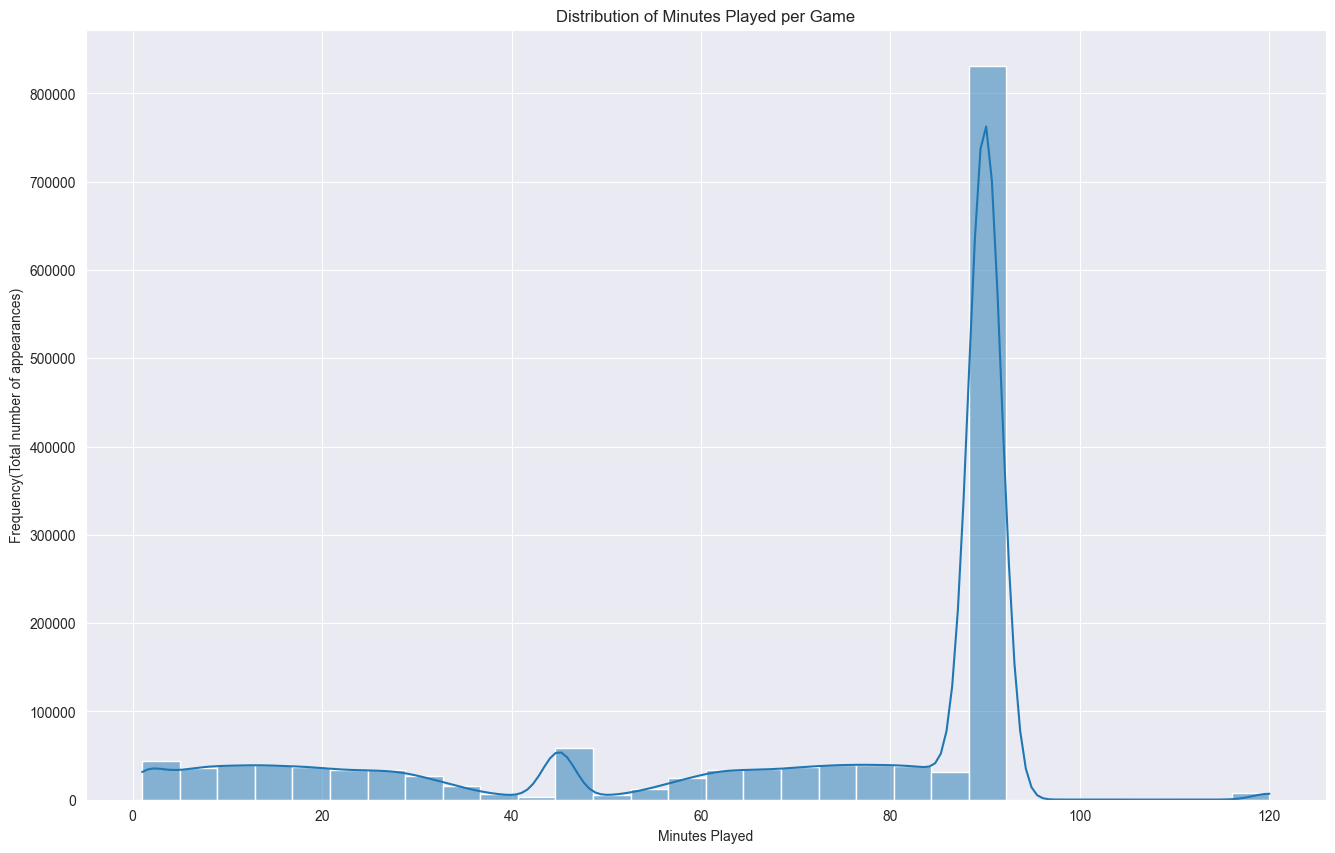

In [52]:
plt.figure(figsize=(16, 10))
sns.histplot(appearances_df['minutes_played'], bins=30, kde=True)
plt.title('Distribution of Minutes Played per Game')
plt.xlabel('Minutes Played')
plt.ylabel('Frequency(Total number of appearances)')
plt.show()

From the result, we can understand that in the "Appearances" dataframe, the majority of entries represent starting players, meaning they play the entire match. We can also observe a peak around the 45th minute, which corresponds to the end of the first half.

### 2.1.3 - Let's analyze the distribution of minutes played for each player. This analysis will provide an in-depth view of how much time, on average, each player spends on the field per game, along with other useful statistics.

In [53]:
player_minutes_stats = appearances_df.groupby('player_name')['minutes_played'].agg(['mean', 'median', 'std', 'count'])
player_minutes_stats

,mean,median,std,count
player_name,,,,
A.J. Soares,70.166667,90.0,32.065038,6
AJ Leitch-Smith,58.620690,79.0,35.028982,29
Aaron Appindangoyé,84.923913,90.0,17.791981,92
Aaron Bastiaans,36.000000,19.0,36.110940,4
Aaron Boupendza,69.891892,90.0,29.116417,37
...,...,...,...,...
İrfan Can Kahveci,66.101639,76.0,27.564389,305
İsmail Yüksek,63.913043,84.0,33.832809,46
İsmail Çokçalış,60.818182,78.0,32.313521,11


Due to the large number of players, it's not possible to graphically represent the distribution of individual players on the X-axis, so they are included in a dataframe.

To search for a specific player, you can use this command(Messi example):
<span style="background-color: #d0d0d0; color: black; padding: 2px;"> messi_stats = player_minutes_stats.loc['Lionel Messi']
</span>

In [54]:
messi_stats = player_minutes_stats.loc['Lionel Messi']
messi_stats

mean       85.044922
median     90.000000
std        16.394952
count     512.000000
Name: Lionel Messi, dtype: float64

### 2.1.4 - Let's verify the distribution of player appearances.

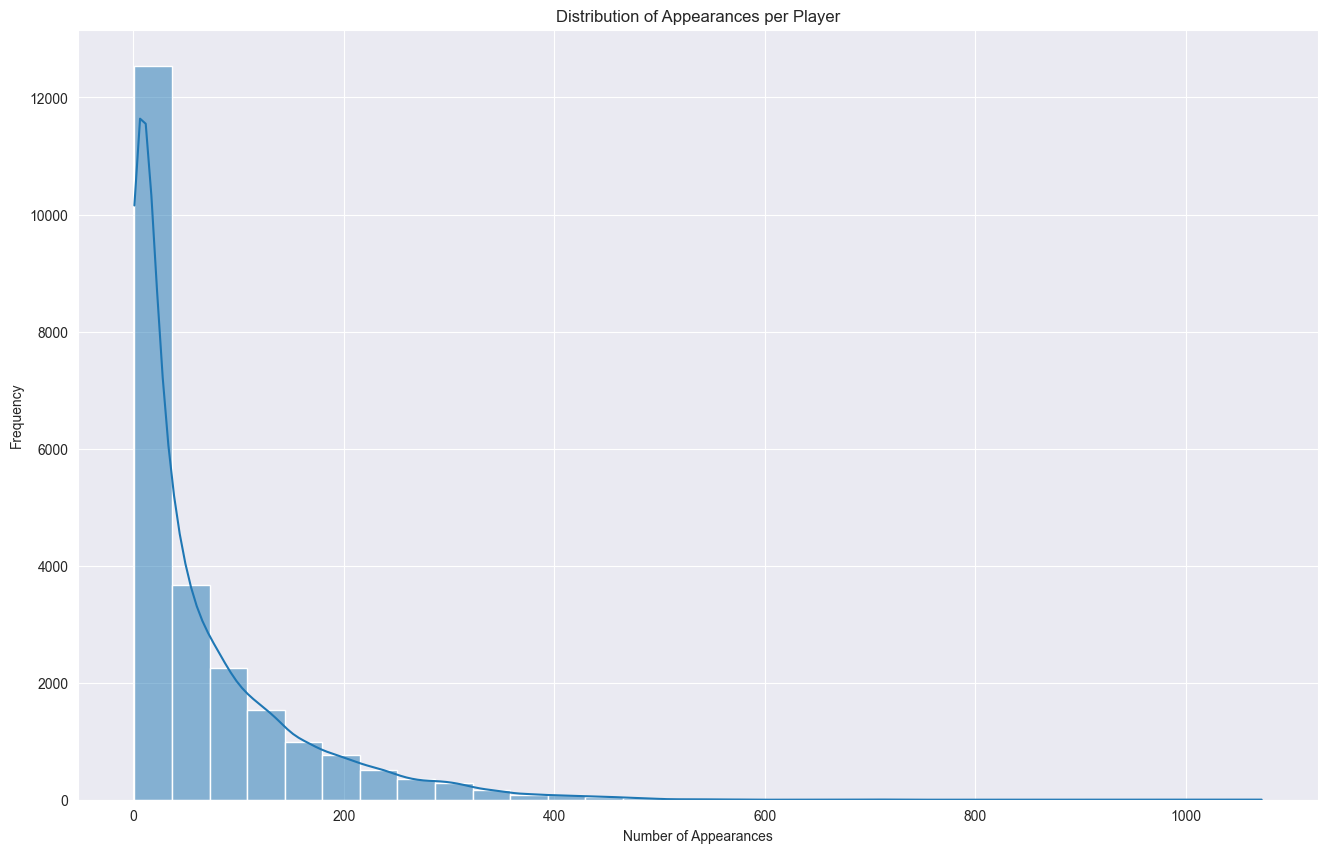

In [55]:
plt.figure(figsize=(16, 10))
sns.histplot(player_minutes_stats['count'], bins=30, kde=True)
plt.title('Distribution of Appearances per Player')
plt.xlabel('Number of Appearances')
plt.ylabel('Frequency')
plt.show()

As can be seen, most players do not exceed 100 appearances. This means that, on average, a football player does not have a career lasting more than 100 games played.

### 2.1.5 - Analysis of the Frequency of Yellow and Red Cards

Let's first calculate the total number of yellow and red cards assigned:

In [56]:
total_yellow_cards = appearances_df['yellow_cards'].sum()
total_red_cards = appearances_df['red_cards'].sum()

print(f"Total yellow card: {total_yellow_cards}")
print(f"Total red card: {total_red_cards}")

Total yellow card: 224630
Total red card: 5769


Let's create two tables that include the numbers of yellow and red cards for each player:

In [57]:
player_yellow_cards = appearances_df.groupby('player_name')['yellow_cards'].sum()
player_yellow_cards

player_name
A.J. Soares            2
AJ Leitch-Smith        1
Aaron Appindangoyé    11
Aaron Bastiaans        0
Aaron Boupendza        7
                      ..
İrfan Can Kahveci     58
İsmail Yüksek         13
İsmail Çokçalış        2
İzzet Çelik            0
Αbdul Razak            0
Name: yellow_cards, Length: 23297, dtype: int64

In [58]:
player_red_cards = appearances_df.groupby('player_name')['red_cards'].sum()
player_red_cards

player_name
A.J. Soares           0
AJ Leitch-Smith       0
Aaron Appindangoyé    0
Aaron Bastiaans       0
Aaron Boupendza       0
                     ..
İrfan Can Kahveci     4
İsmail Yüksek         0
İsmail Çokçalış       0
İzzet Çelik           0
Αbdul Razak           0
Name: red_cards, Length: 23297, dtype: int64

Let's verify the distribution of the top 10 players with the most yellow cards and the top 10 players with the most red cards:

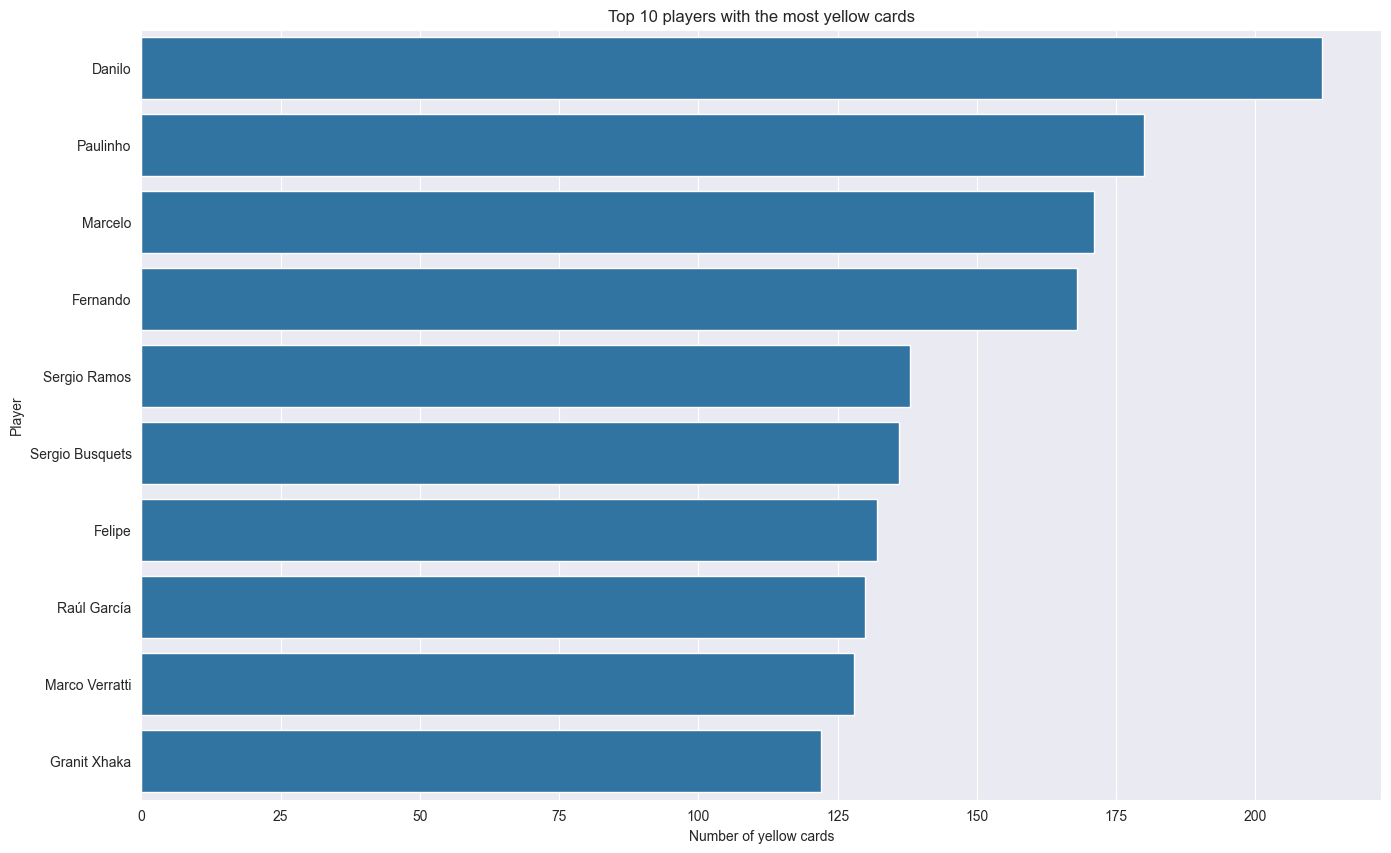

In [59]:
top_yellow_cards = player_yellow_cards.sort_values(ascending=False).head(10)

plt.figure(figsize=(16, 10))
sns.barplot(x=top_yellow_cards, y=top_yellow_cards.index)
plt.title('Top 10 players with the most yellow cards')
plt.xlabel('Number of yellow cards')
plt.ylabel('Player')
plt.show()

<span style="background-color: #d0d0d0; color: black; padding: 2px;">Based on these data, the top 4 players each have more than 150 yellow cards each.
</span>

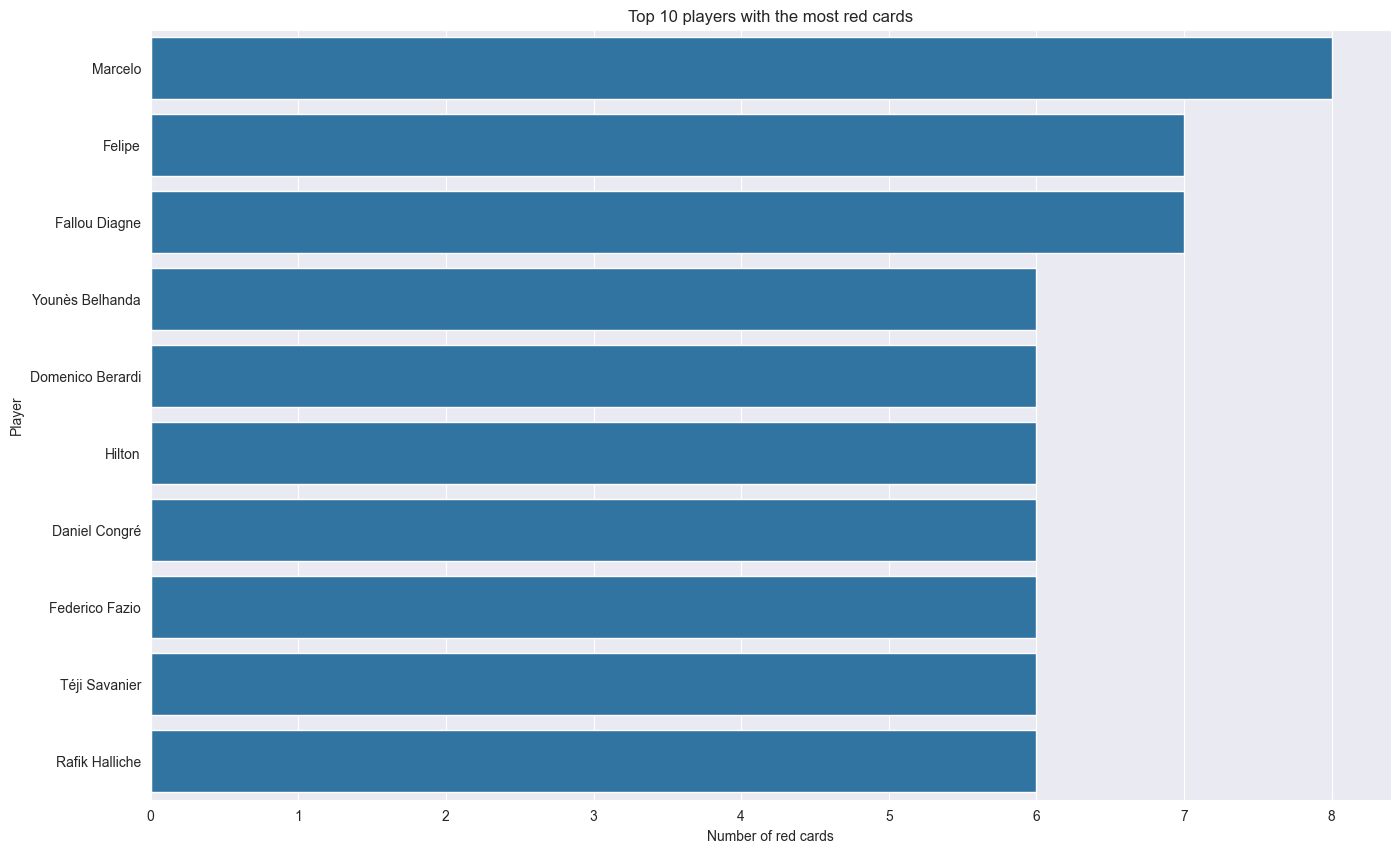

In [60]:
top_red_cards = player_red_cards.sort_values(ascending=False).head(10)

plt.figure(figsize=(16, 10))
sns.barplot(x=top_red_cards, y=top_red_cards.index)
plt.title('Top 10 players with the most red cards')
plt.xlabel('Number of red cards')
plt.ylabel('Player')
plt.show()

<span style="background-color: #d0d0d0; color: black; padding: 2px;">Marcelo takes the first position with 8 red cards, while Felipe and Fallou Diagne share the second place with 7 red cards each. The third place is shared by the remaining players.
</span>


### TODO: ADVANCED ANALYSIS

## 2.2 Club games dataframe analysis

### 2.2.1 - Analysis of club performances at home vs. away matches.

As a first step, let's separate the home matches from the away matches.

In [61]:
home_games = club_games_df[club_games_df['hosting'] == 'Home']
away_games = club_games_df[club_games_df['hosting'] == 'Away']

Let's count the number of wins and losses for both home and away matches.

In [62]:
home_stats = home_games.groupby('hosting')['is_win'].value_counts().unstack()
home_stats

is_win,0,1
hosting,,
Home,35680,29536


In [63]:
away_stats = away_games.groupby('hosting')['is_win'].value_counts().unstack()
away_stats

is_win,0,1
hosting,,
Away,43531,21685


Let's merge the two dataframes so that we can represent them with a stacked bar chart.

In [64]:
stats_win_lose = pd.concat([home_stats, away_stats], axis=0)

In [65]:
stats_win_lose

is_win,0,1
hosting,,
Home,35680,29536
Away,43531,21685


### Let's represent the values in the form of a bar chart.

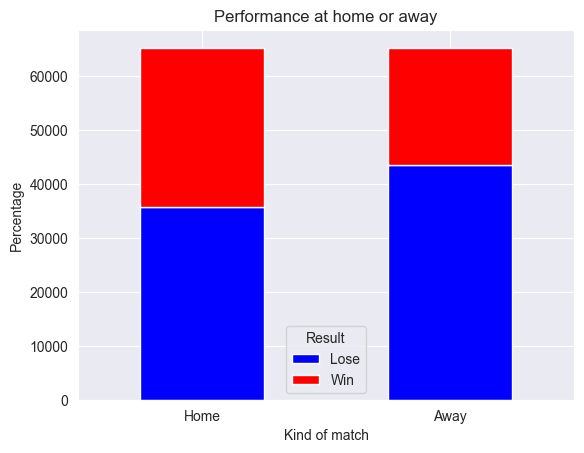

In [66]:
stats_win_lose.rename(columns={0: 'Lose', 1: 'Win'}, inplace=True)
colors = ['Blue', 'Red']
stats_win_lose.plot(kind='bar', stacked=True, color=colors)
plt.title('Performance at home or away')
plt.xlabel('Kind of match')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Result')
plt.show()

<span style="background-color: #d0d0d0; color: black; padding: 2px;">It is evident that playing away from home is less favorable compared to playing at home.
</span>

### A small elaboration:

Is it possible to also have detailed percentages for the various teams

In [67]:
home_stat_clubs = home_games.groupby('club_id')['is_win'].value_counts().unstack()
home_stat_clubs['win_rate'] = home_stat_clubs[1] / home_stat_clubs.sum(axis=1)
home_stat_clubs['lose_rate'] = home_stat_clubs[0] / home_stat_clubs.sum(axis=1)
home_stat_clubs.rename(columns={0: 'Lose', 1: 'Win'}, inplace=True)
merge_club_home = pd.merge(clubs_df, home_stat_clubs, left_on='club_id', right_on='club_id', how='inner')
merge_club_home[['name', 'win_rate', 'lose_rate']]

,name,win_rate,lose_rate
0,Sportverein Darmstadt 1898 e. V.,0.255319,0.740657
1,FK Ural Yekaterinburg,0.372881,0.625800
2,Beşiktaş Jimnastik Kulübü,0.635593,0.363428
3,Associazione Sportiva Roma,0.632143,0.367029
4,Tottenham Hotspur Football Club,0.644366,0.354829
...,...,...,...
421,CF Os Belenenses,0.346535,0.651231
422,Football Club Volendam,0.468750,0.523580
423,Atalanta Bergamasca Calcio S.p.a.,0.494253,0.504791
424,Moreirense Futebol Clube,0.325714,0.673033


<span style="background-color: #d0d0d0; color: black; padding: 2px;">Percentages of wins or losses for the teams playing at home.
</span>

In [68]:
away_stat_clubs = away_games.groupby('club_id')['is_win'].value_counts().unstack()
away_stat_clubs['win_rate'] = away_stat_clubs[1] / away_stat_clubs.sum(axis=1)
away_stat_clubs['lose_rate'] = away_stat_clubs[0] / away_stat_clubs.sum(axis=1)
away_stat_clubs.rename(columns={0: 'Lose', 1: 'Win'}, inplace=True)
merge_club_away = pd.merge(clubs_df, away_stat_clubs, left_on='club_id', right_on='club_id', how='inner')
merge_club_away[['name', 'win_rate', 'lose_rate']]

,name,win_rate,lose_rate
0,Sportverein Darmstadt 1898 e. V.,0.296296,0.699864
1,FK Ural Yekaterinburg,0.286486,0.712410
2,Beşiktaş Jimnastik Kulübü,0.476793,0.522156
3,Associazione Sportiva Roma,0.430147,0.568953
4,Tottenham Hotspur Football Club,0.429553,0.569606
...,...,...,...
421,CF Os Belenenses,0.223301,0.775019
422,Football Club Volendam,0.117647,0.879310
423,Atalanta Bergamasca Calcio S.p.a.,0.398406,0.600640
424,Moreirense Futebol Clube,0.279762,0.719041


<span style="background-color: #d0d0d0; color: black; padding: 2px;">Percentages of wins or losses for the teams playing away.
</span>

### 2.2.2 - Goal teams analysis

We will try to do some experiments on the goals scored by the main European teams.

First, we choose Italian teams and English teams as our sample. We create two separate dataframes in which each contains the teams with the relative goals scored in the recorded matches.

In [69]:
club_goals = pd.merge(club_games_df.groupby('club_id')['own_goals'].sum(), clubs_df, left_on='club_id',right_on='club_id')
club_goals.rename(columns={'own_goals':'goals'},inplace=True)
italian_score = club_goals[club_goals['domestic_competition_id'] == 'IT1']
english_score = club_goals[club_goals['domestic_competition_id'] == 'GB1']

### Italian teams

In [70]:
italian_score.reset_index(inplace=True)
italian_score

,index,club_id,goals,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record
0,2,5,873,Associazione Calcio Milan,IT1,NaN,29,26.3,22,75.9,15,Giuseppe Meazza,75923,€-47.40m
1,6,12,981,Associazione Sportiva Roma,IT1,NaN,26,27.4,17,65.4,17,Olimpico di Roma,73261,+€65.20m
2,11,19,68,Brescia Calcio,IT1,NaN,28,25.1,12,42.9,1,Mario Rigamonti,19550,+€3.65m
3,27,46,993,Football Club Internazionale Milano S.p.A.,IT1,NaN,25,29.0,16,64.0,19,Giuseppe Meazza,75923,+€65.20m
4,44,130,311,Parma Calcio 1913,IT1,NaN,30,24.9,23,76.7,6,Ennio Tardini,22352,€-4.37m
5,71,252,497,Genoa Cricket and Football Club,IT1,NaN,27,27.0,20,74.1,9,Luigi Ferraris,34901,€-17.38m
6,74,276,429,Verona Hellas Football Club,IT1,NaN,33,25.8,22,66.7,8,Marcantonio Bentegodi,39211,+€43.46m
7,95,380,128,U.S. Salernitana 1919 S.r.l.,IT1,NaN,27,27.1,21,77.8,10,Arechi,29739,€-24.69m
8,98,398,953,Società Sportiva Lazio S.p.A.,IT1,NaN,29,27.4,17,58.6,11,Olimpico di Roma,73261,+€10.44m
9,102,410,602,Udinese Calcio,IT1,NaN,36,25.1,31,86.1,8,Bluenergy Stadium,25144,+€5.56m


We check the distribution of goals for each team.

C:\Users\danie\AppData\Local\Temp\ipykernel_22316\2279870690.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='goals', data=italian_score, palette='viridis')


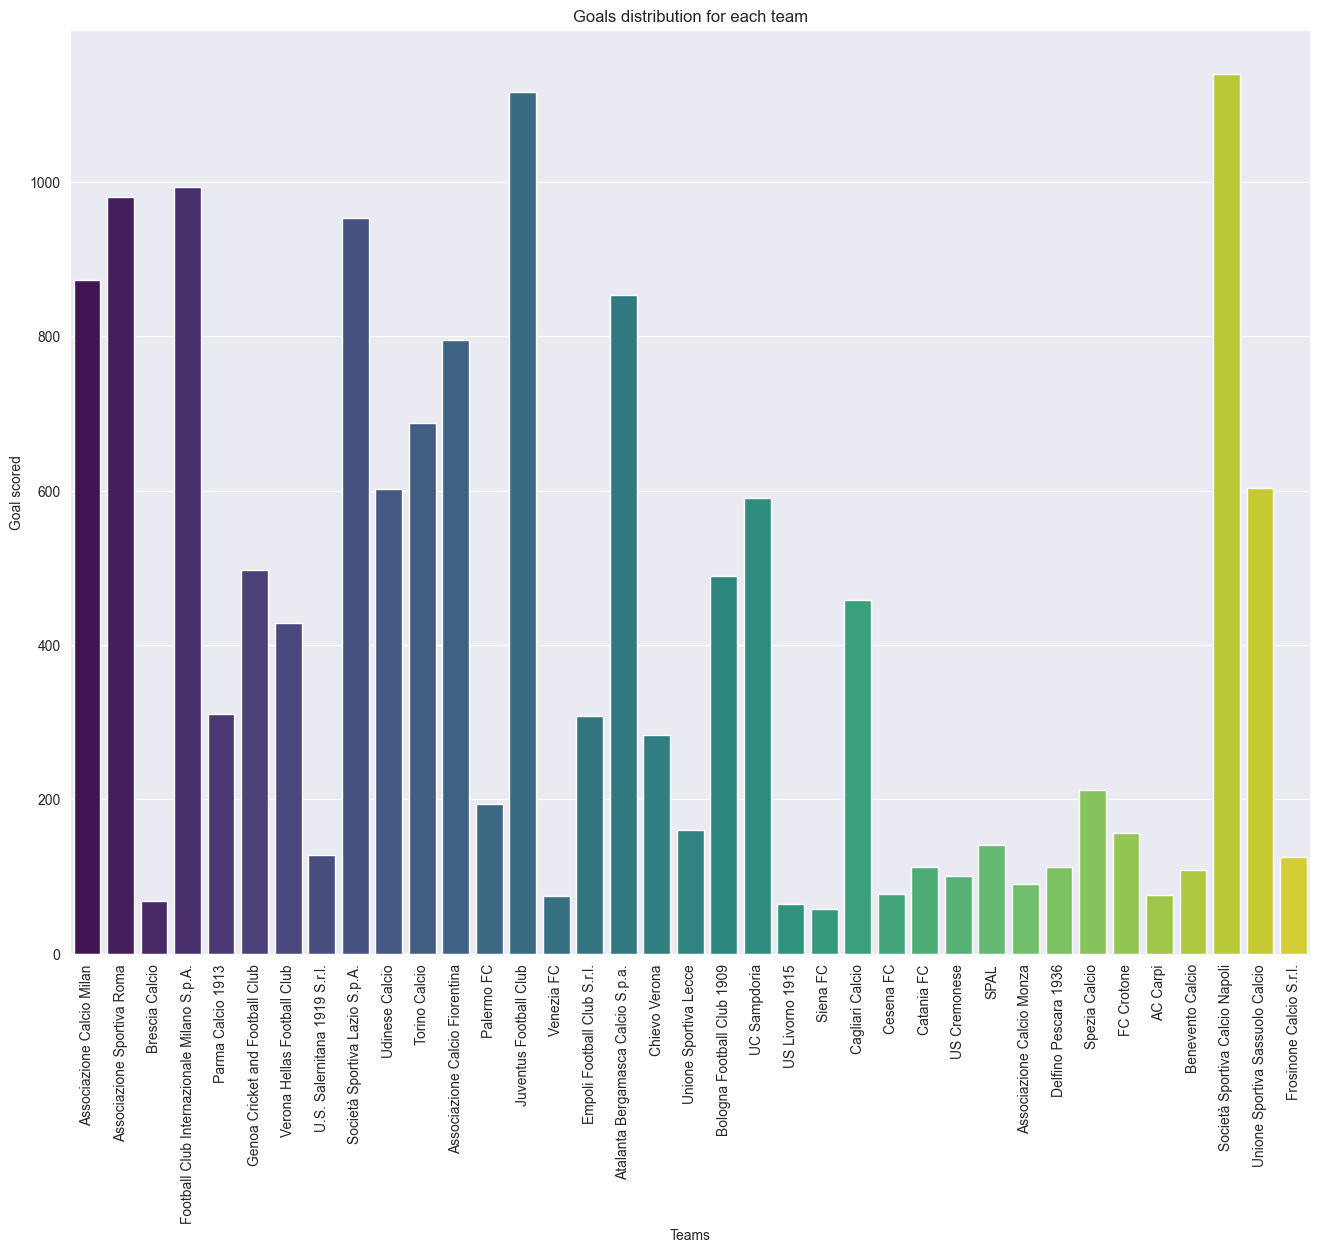

In [71]:
plt.figure(figsize=(16, 12))
sns.barplot(x='name', y='goals', data=italian_score, palette='viridis')

plt.title('Goals distribution for each team')
plt.xlabel('Teams')
plt.ylabel('Goal scored')
plt.xticks(rotation= 90)

plt.show()

<span style="background-color: #d0d0d0; color: black; padding: 2px;">As we can see from the chart, the two teams Napoli and Juventus are the top scorers in Italy.
</span>

### Correlation between average age and goals scored
We want to find out if young teams are the best scorers and therefore as the average age decreases, more goals are scored.

In [72]:
italian_corr = italian_score[['goals','average_age']].corr()
italian_corr

,goals,average_age
goals,1.000000,0.469895
average_age,0.469895,1.000000


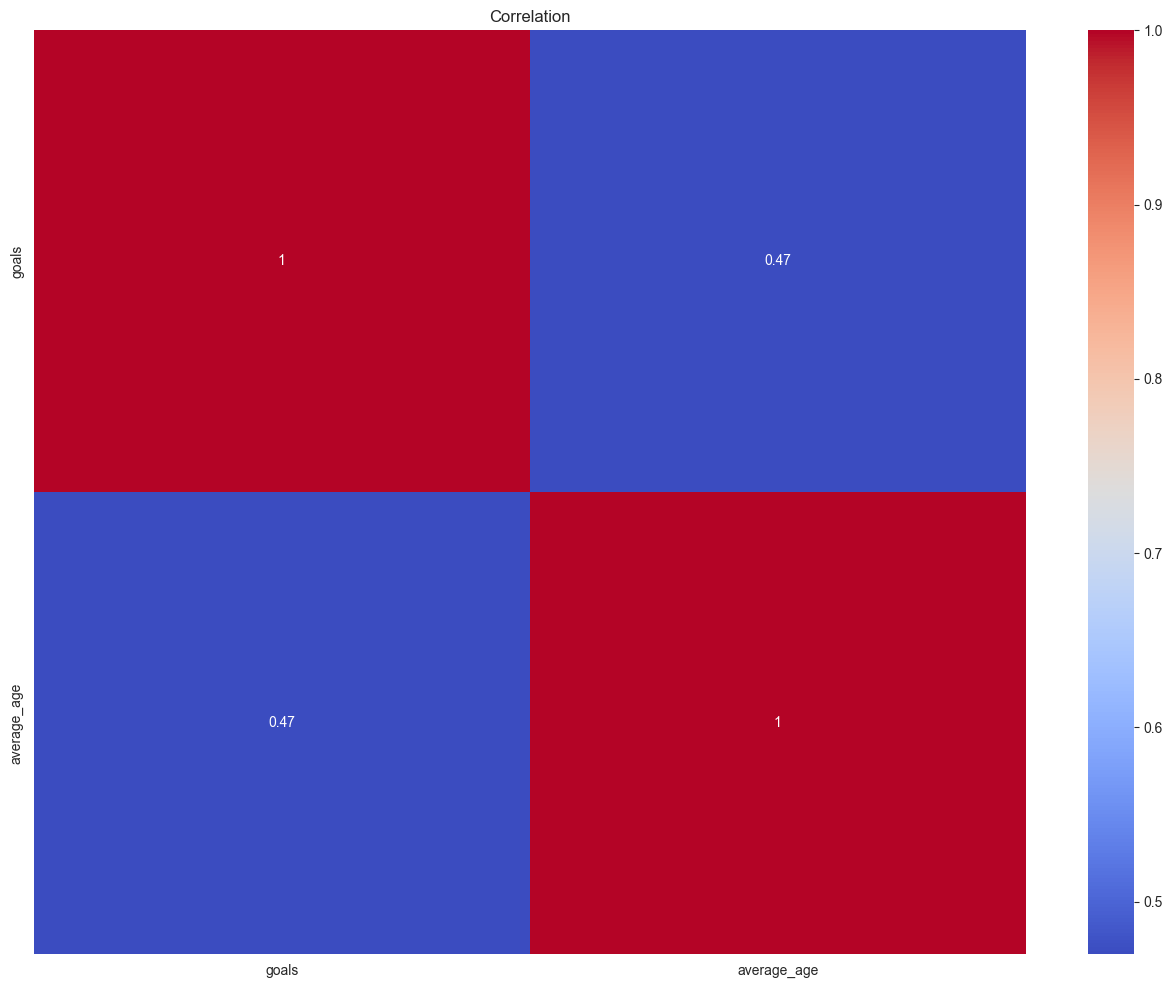

In [73]:
plt.figure(figsize=(16, 12))
sns.heatmap(italian_corr, annot=True, cmap='coolwarm')

plt.title('Correlation')
plt.show()

- A correlation coefficient close to -1 indicates a strong negative correlation. It means that as the average age decreases, the number of goals scored tends to increase.
 - A coefficient close to 0 indicates weak or no correlation. In this case, there is no obvious linear relationship between average age and goals scored.
 - A coefficient close to +1 indicates a strong positive correlation, which would mean that as the average age decreases, goals scored also decrease


### English teams

We carry out the same measurements for the English teams.

In [74]:
english_score.reset_index(inplace=True)
english_score

,index,club_id,goals,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record
0,5,11,1118,Arsenal Football Club,GB1,NaN,25,25.8,18,72.0,20,Emirates Stadium,60704,€-167.04m
1,16,29,678,Everton Football Club,GB1,NaN,25,27.3,11,44.0,6,Goodison Park,39571,+€42.30m
2,17,31,1199,Liverpool Football Club,GB1,NaN,26,26.2,21,80.8,17,Anfield,54074,€-111.30m
3,50,148,1058,Tottenham Hotspur Football Club,GB1,NaN,29,26.2,21,72.4,22,Tottenham Hotspur Stadium,62062,€-130.40m
4,59,180,598,Southampton FC,GB1,NaN,29,24.5,20,69.0,13,St Mary's Stadium,32384,+€2.40m
5,75,281,1432,Manchester City Football Club,GB1,NaN,24,27.2,17,70.8,21,Etihad Stadium,55017,€-126.60m
6,76,289,215,Sunderland AFC,GB1,NaN,26,23.5,12,46.2,6,Stadium of Light,48707,€-6.06m
7,86,350,145,Sheffield United Football Club,GB1,NaN,30,25.9,18,60.0,8,Bramall Lane,32702,€-33.55m
8,94,379,688,West Ham United Football Club,GB1,NaN,25,28.4,18,72.0,14,London Stadium,62500,+€18.84m
9,99,399,189,Leeds United,GB1,NaN,27,24.6,18,66.7,9,Elland Road,37890,+€930k


C:\Users\danie\AppData\Local\Temp\ipykernel_22316\2334291506.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='goals', data=english_score, palette='viridis')


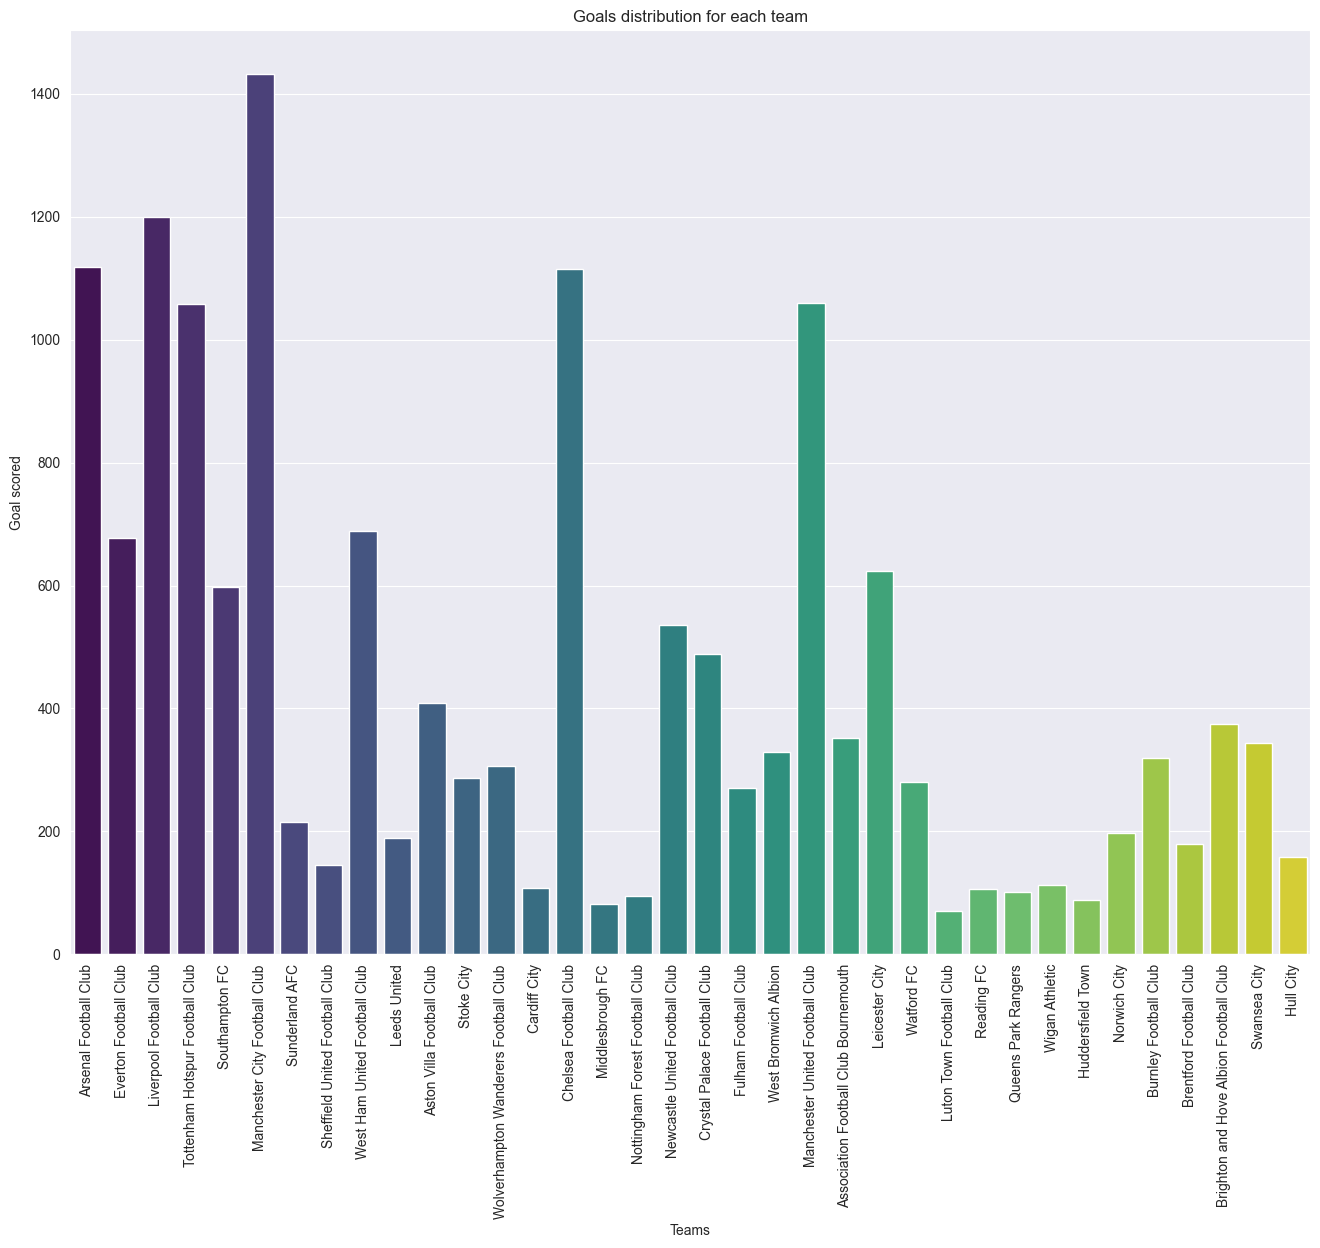

In [75]:
plt.figure(figsize=(16, 12))
sns.barplot(x='name', y='goals', data=english_score, palette='viridis')

plt.title('Goals distribution for each team')
plt.xlabel('Teams')
plt.ylabel('Goal scored')
plt.xticks(rotation= 90)

plt.show()

In [76]:
english_corr = english_score[['goals','average_age']].corr()
english_corr

,goals,average_age
goals,1.00000,0.13216
average_age,0.13216,1.00000


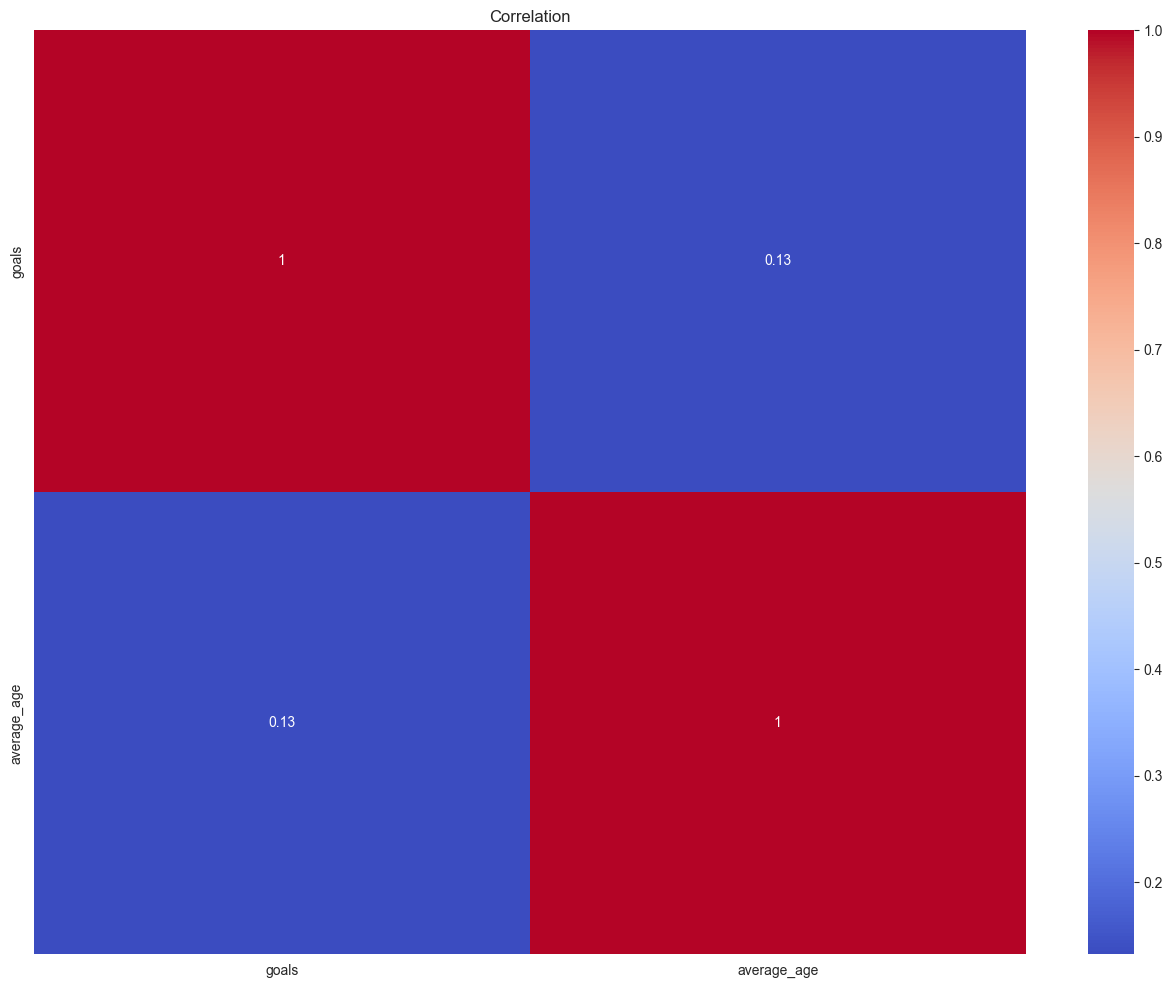

In [77]:
plt.figure(figsize=(16, 12))
sns.heatmap(english_corr, annot=True, cmap='coolwarm')

plt.title('Correlation')
plt.show()

## 2.3 Clubs Analysis


### 2.3.1 - Distribution of teams
We verify the distribution of the teams on European territory.

In [131]:
country_club = pd.merge(clubs_df,competitions_df,left_on='domestic_competition_id',right_on='domestic_league_code')
country_club.drop_duplicates(subset=['name_x'],inplace=True)
sub_country = country_club[['name_x','country_name']]

In [132]:
sub_country

,name_x,country_name
0,Sportverein Darmstadt 1898 e. V.,Germany
3,FC Ingolstadt 04,Germany
6,1.FC Nuremberg,Germany
9,Borussia Verein für Leibesübungen 1900 Mönchen...,Germany
12,1. Fußballclub Heidenheim 1846,Germany
...,...,...
1099,Racing Club de Lens,France
1101,Toulouse Football Club,France
1103,Olympique Gymnaste Club Nice Côte d'Azur,France
1105,AJ Auxerre,France


<span style="background-color: #d0d0d0; color: black; padding: 2px;">Here we have merged the two dataframes 'Clubs' and 'Competitions', in order to derive the nationalities of origin of the teams.
</span>

We represent the distribution of the teams on a map, we use specific libraries for displaying this type of data.

In [168]:
geojson_path = r'C:\Users\danie\Desktop\custom.geo.json'

# Load the GeoJSON of country 
with open(geojson_path, 'r', encoding='utf-8') as f: geojson_countries = json.load(f)


countries_counts = sub_country['country_name'].value_counts().reset_index()
countries_counts.columns = ['country', 'num_teams']
countries_counts.loc[2, 'country'] = 'United Kingdom'

# Display Europe as the center of the map
mappa_europa = folium.Map(location=[54.5260, 15.2551], zoom_start=4)

# Overlay the choropleth map onto the base map
folium.Choropleth(
    geo_data=geojson_countries,
    name='choropleth',
    data=countries_counts,
    columns=['country', 'num_teams'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',  
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Numero di squadre per nazione',
    nan_fill_color='transparent' 
).add_to(mappa_europa)

# View the map
mappa_europa

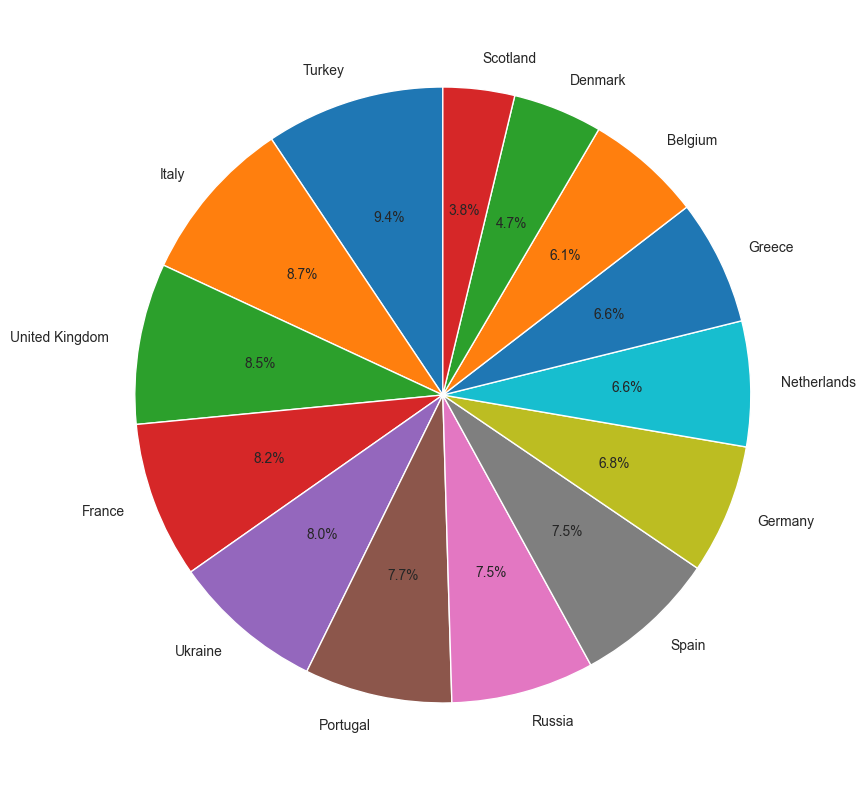

In [165]:
# countries_counts.set_index('country',inplace=True) -> To be performed only once to set the names of the countries as the index

plt.figure(figsize=(12, 10))
countries_counts['num_teams'].plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.show()

<span style="background-color: #d0d0d0; color: black; padding: 2px;">As we can see from the map and the pie chart, the teams represented in the dataframe are distributed quite evenly for each nation present, with some peaks for the Italian and Turkish teams and some declines for the Scottish and Danish teams.
</span>

In [166]:
countries_counts

,num_teams
country,
Turkey,40
Italy,37
United Kingdom,36
France,35
Ukraine,34
Portugal,33
Russia,32
Spain,32
Germany,29



<span style = "background-color: #d0d0d0; color: black; padding: 2px;" >The table confirms the graphical displays.
</span >

### TEST MAPS TEST MAPS TRUSTEDYUPPPP